In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm.notebook import tqdm

In [38]:
datapath = "D:\\Dati_dso\\tesi\\"

In [39]:
ls $datapath

 Il volume nell'unit… D Š Data
 Numero di serie del volume: 7009-8AD6

 Directory di D:\Dati_dso\tesi

30/08/2023  14:44    <DIR>          .
29/08/2023  12:39    <DIR>          ..
29/08/2023  12:32       969.485.841 20230828-1038_dark_trg-su-ch1.txt
29/08/2023  16:43     2.095.227.215 20230828-1235_dark_trg-su-ch2.txt
29/08/2023  10:28     1.085.099.394 20230828-1743_BGO_2SIPM_no-filtri_trigger_ext.txt
30/08/2023  11:07     1.030.826.424 20230829-1711_pmma.txt
31/08/2023  09:11     1.268.577.482 20230830-1130_pwo.txt
30/08/2023  14:43       173.954.657 20230830-1130_pwo_cut.txt
               6 File  6.623.171.013 byte
               2 Directory  1.961.773.613.056 byte disponibili


In [40]:
df = pd.read_csv(datapath+'20230830-1130_pwo.txt', sep=" ", header=None, names=["frame", "x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]).dropna()

In [41]:
df

,frame,x1,y1,x2,y2,x3,y3,x4,y4
0,1.0,-7.000000e-07,-0.0008,-7.000000e-07,0.0008,-7.000000e-07,-0.004,-7.000000e-07,0.001
1,1.0,-6.990000e-07,-0.0008,-6.990000e-07,0.0008,-6.990000e-07,-0.004,-6.990000e-07,-0.003
2,1.0,-6.980000e-07,-0.0008,-6.980000e-07,0.0000,-6.980000e-07,-0.004,-6.980000e-07,-0.001
3,1.0,-6.970000e-07,-0.0008,-6.970000e-07,0.0008,-6.970000e-07,-0.004,-6.970000e-07,-0.003
4,1.0,-6.960000e-07,-0.0008,-6.960000e-07,0.0000,-6.960000e-07,-0.004,-6.960000e-07,-0.001
...,...,...,...,...,...,...,...,...,...
7762995,5545.0,6.950000e-07,0.0000,6.950000e-07,0.0000,6.950000e-07,0.002,6.950000e-07,-0.001
7762996,5545.0,6.960000e-07,0.0000,6.960000e-07,0.0000,6.960000e-07,0.000,6.960000e-07,0.001
7762997,5545.0,6.970000e-07,-0.0008,6.970000e-07,0.0000,6.970000e-07,0.002,6.970000e-07,-0.001
7762998,5545.0,6.980000e-07,-0.0008,6.980000e-07,0.0008,6.980000e-07,0.002,6.980000e-07,0.001


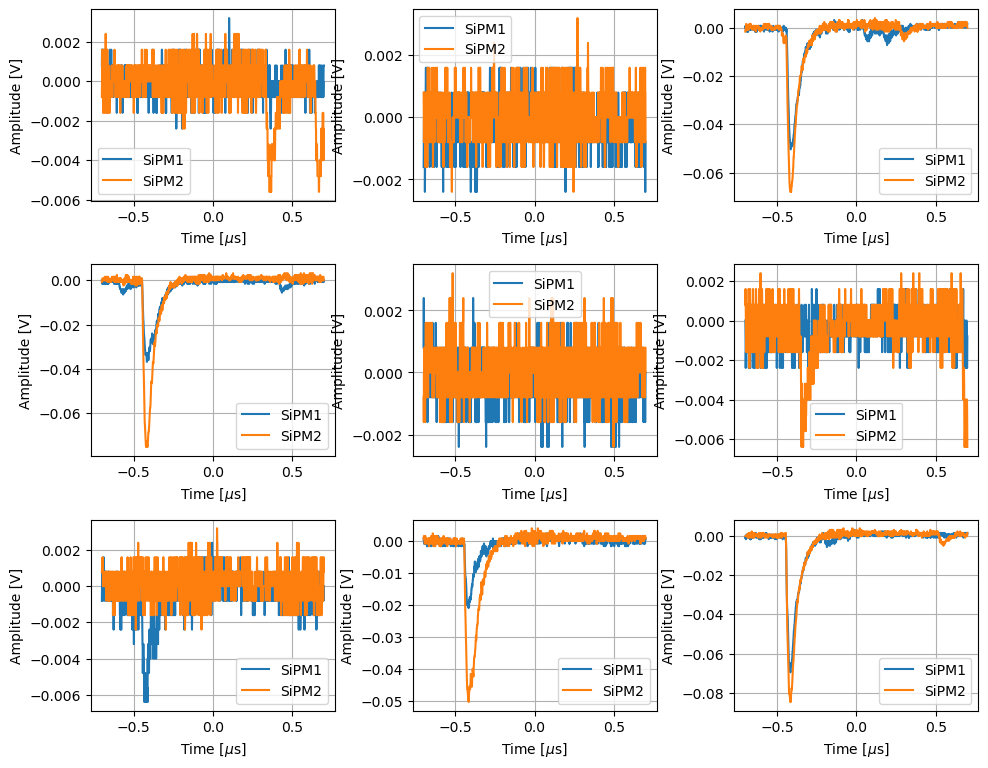

In [42]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.x1*1E6, d.y1, label='SiPM1')
    axs[i][j].plot(d.x2*1E6, d.y2, label='SiPM2')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [V]')#, size=14)
    axs[i][j].grid()
    axs[i][j].legend()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


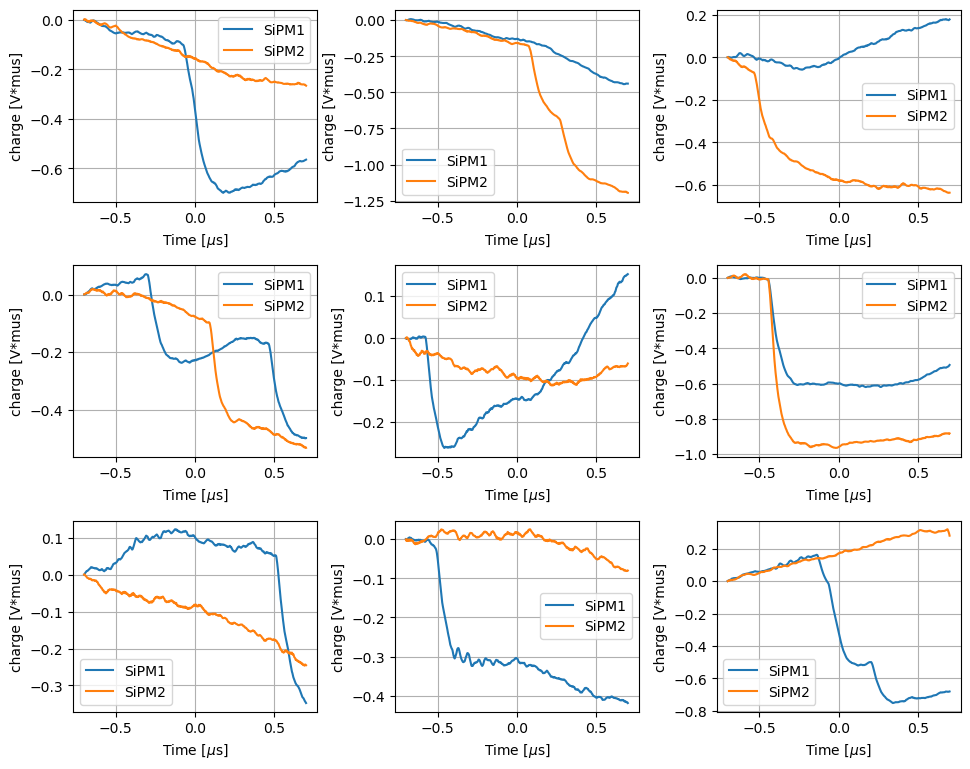

In [7]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.x1*1E6, d.y1.cumsum(), label='SiPM1')
    axs[i][j].plot(d.x2*1E6, d.y2.cumsum(), label='SiPM2')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('charge [V*mus]')#, size=14)
    axs[i][j].grid()
    axs[i][j].legend()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [47]:
%time
# stesso di sopra ma molto piu veloce

grouped = df.groupby('frame')

CH2 = grouped['y2'].apply(lambda x: np.abs(x).max()).tolist()
CH1 = grouped['y1'].apply(lambda x: np.abs(x).max()).tolist()

Wall time: 0 ns


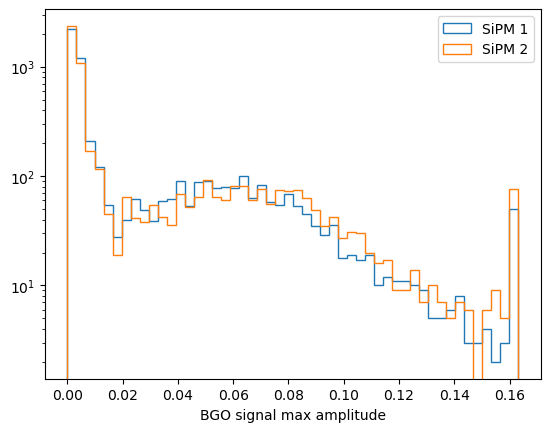

In [48]:
maxv = np.max([np.max(CH1), np.max(CH2)])

plt.hist(CH1, bins=50, range=[0, maxv], histtype='step', label='SiPM 1')
plt.hist(CH2, bins=50, range=[0, maxv], histtype='step', label='SiPM 2')

plt.legend()
plt.yscale('log')
plt.xlabel('BGO signal max amplitude')
plt.show()

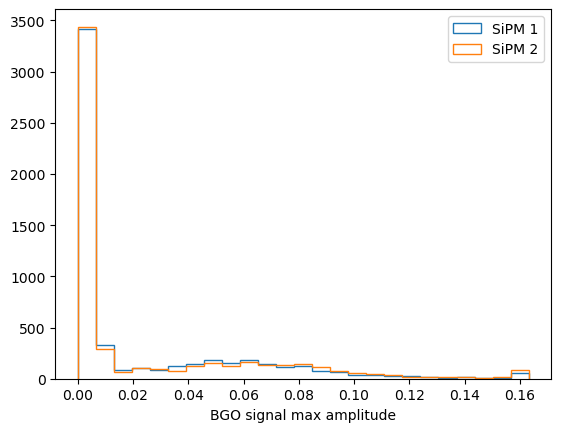

In [49]:
maxv = np.max([np.max(CH1), np.max(CH2)])

plt.hist(CH1, bins=25, range=[0., maxv], histtype='step', label='SiPM 1')
plt.hist(CH2, bins=25, range=[0., maxv], histtype='step', label='SiPM 2')

plt.legend()
#plt.yscale('log')
plt.xlabel('BGO signal max amplitude')
plt.show()

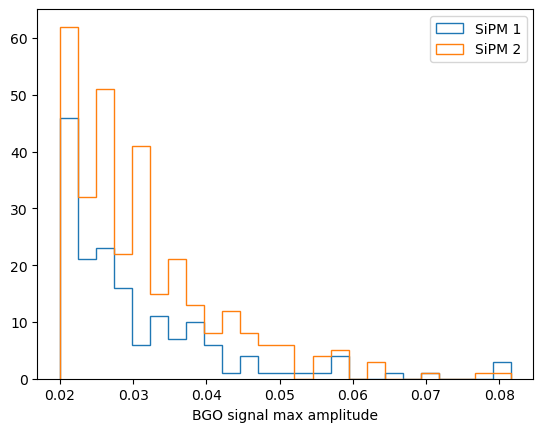

In [34]:
maxv = np.max([np.max(CH1), np.max(CH2)])

plt.hist(CH1, bins=25, range=[0.02, maxv], histtype='step', label='SiPM 1')
plt.hist(CH2, bins=25, range=[0.02, maxv], histtype='step', label='SiPM 2')

plt.legend()
#plt.yscale('log')
plt.xlabel('BGO signal max amplitude')
plt.show()

In [46]:
len(CH1)

3498

Text(0, 0.5, 'ch2')

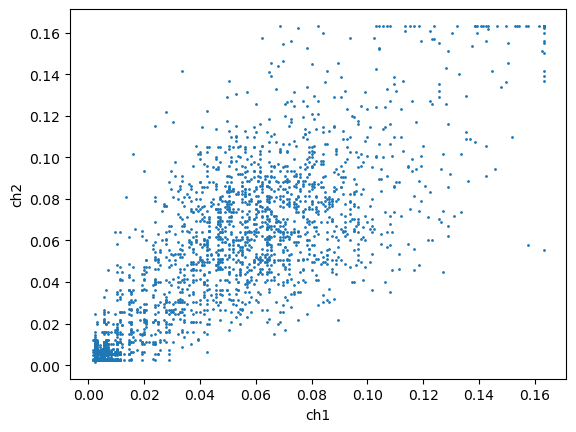

In [50]:
plt.scatter(CH1, CH2, s=1, label='filtro sopra')
plt.xlabel('ch1')
plt.ylabel('ch2')